# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

##### Problem 1 Answer:
* The dataset includes 17 marketing campaigns between May 2008 and November 2010

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



#### Feature Understanding
* Numeric data can be scaled using Standard Scaler
* Categorical features can be encoded using One-Hot Encoding and Ordinal Encoding
* 'duration' feature should be removed before training
* 

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Business Objective
* **Create a model that can accurately predict if a marketing campaign will be successful based on attributes of the client**

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [16]:
# Mapping output variable to binary
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Separating features and output. 'duration' column is removed as it is only provided for benchmark reasons
X = df.drop(['y', 'duration'], axis=1)
y = df['y']

# Identifying numeric and categorical columns for pre-processing
num_cols = list(X.select_dtypes(include=['int64', 'float64']).columns.values)
cat_cols = list(X.select_dtypes(include=['object']).columns.values)

# Column transformations to scale numeric columns, and One-Hot Encoding for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), num_cols),
        ('ohe_cat', OneHotEncoder(), cat_cols)
    ]
)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [22]:
baseline = Pipeline([
    ('transform', preprocessor),
    ('dummy', DummyClassifier(strategy='stratified', random_state=42))
])

In [23]:
fitted_baseline = baseline.fit(X_train, y_train)
baseline_predictions = fitted_baseline.predict(X_test)
baseline_score = accuracy_score(y_test, baseline_predictions)
print(f"Baseline Accuracy Score: {baseline_score}")

Baseline Accuracy Score: 0.7992231124059238


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [25]:
from sklearn.linear_model import LogisticRegression

# Instantiating and fitting logistic regression model with default hyperparameters
log_reg = Pipeline([
    ('transform', preprocessor),
    ('logistic_regression', LogisticRegression())
])
fitted_log_reg = log_reg.fit(X_train, y_train)

### Problem 9: Score the Model

What is the accuracy of your model?

In [27]:
log_reg_predictions = fitted_log_reg.predict(X_test)
log_reg_score = accuracy_score(y_test, log_reg_predictions)
print(f"Logistic Regression Test Accuracy Score: {log_reg_score}")

Logistic Regression Test Accuracy Score: 0.9008659059642308


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [29]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC

In [30]:
# Instantiating all models with default hyperparameters
knn = Pipeline([
    ('transform', preprocessor),
    ('knn', KNeighborsClassifier())
])

decision_tree = Pipeline([
    ('transform', preprocessor),
    ('tree', DecisionTreeClassifier())
])

svm = Pipeline([
    ('transform', preprocessor),
    ('svm', SVC())
])

# Creating dictionary for model names to be displayed in DataFrame
model_dict = {baseline: "Baseline (Stratified)",
             log_reg: "Logistic Regression",
             knn: "K Nearest Neighbors",
             decision_tree: "Decision Tree",
             svm: "Support Vector Machine"}

In [31]:
# Creating a function to evaluate runtime, training accuracy, and test accuracy for a list of un-fitted models
def model_checker(models):
    # Empty lists to append after iterating through each model
    model_names = []
    train_times = []
    train_accs = []
    test_accs = []

    # Looping over each model from list
    for model in models:
        # Training model and calculating runtime
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()

        # Computing training and test accuracy
        train_acc = accuracy_score(y_train, model.predict(X_train))
        test_acc = accuracy_score(y_test, model.predict(X_test))

        # Adding information to lists
        model_names.append(model_dict[model])
        train_times.append(end_time - start_time)
        train_accs.append(train_acc)
        test_accs.append(test_acc)

    # Create data frame with each list as a column
    summary = pd.DataFrame({'Model': model_names,
                            'Train Time': train_times,
                            'Train Accuracy': train_accs,
                            'Test Accuracy': test_accs})
    # Display data frame
    display(summary)

In [32]:
# List of fitted models
models = [baseline, log_reg, knn, decision_tree, svm]

model_checker(models)

,Model,Train Time,Train Accuracy,Test Accuracy
0,Baseline (Stratified),0.112963,0.797510,0.799223
1,Logistic Regression,0.436858,0.900281,0.900866
2,K Nearest Neighbors,0.138956,0.913045,0.889698
3,Decision Tree,0.619800,0.995595,0.840252
4,Support Vector Machine,121.068276,0.904825,0.900704


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [34]:
from sklearn.feature_selection import SelectKBest

# Re-instantiating models only selecting the 20 best features with SelectKBest
baseline = Pipeline([
    ('transform', preprocessor),
    ('selector', SelectKBest(k=20)),
    ('dummy', DummyClassifier(strategy='stratified', random_state=42))
])

log_reg = Pipeline([
    ('transform', preprocessor),
    ('selector', SelectKBest(k=20)),
    ('logistic_regression', LogisticRegression())
])

knn = Pipeline([
    ('transform', preprocessor),
    ('selector', SelectKBest(k=20)),
    ('knn', KNeighborsClassifier())
])

decision_tree = Pipeline([
    ('transform', preprocessor),
    ('selector', SelectKBest(k=20)),
    ('tree', DecisionTreeClassifier())
])

svm = Pipeline([
    ('transform', preprocessor),
    ('selector', SelectKBest(k=20)),
    ('svm', SVC())
])

In [35]:
# Re-running the baseline classifier with reduced features
fitted_baseline = baseline.fit(X_train, y_train)
baseline_predictions = fitted_baseline.predict(X_test)
baseline_score = accuracy_score(y_test, baseline_predictions)

print(f"Baseline Accuracy Score with 20 Best Features: {baseline_score}")

Baseline Accuracy Score with 20 Best Features: 0.7992231124059238


In [36]:
import numpy as np

# Grid Search CV to find best Logistic Regression hyperparameters
log_reg_params = {'logistic_regression__C': np.linspace(0.001, 1000, 10)}

# Training and computing runtime
start_time = time.time()
log_reg_grid = GridSearchCV(estimator=log_reg,
                           param_grid = log_reg_params).fit(X_train, y_train)
end_time = time.time()
runtime = end_time - start_time

# Output accuracy of best model and its hyperparameters
best_log_reg = log_reg_grid.best_estimator_
best_log_reg_score = accuracy_score(y_test, best_log_reg.predict(X_test))
best_log_params = log_reg_grid.best_params_['logistic_regression__C']

print(f"Optimized Test Accuracy Score: {best_log_reg_score}")
print(f"Best value for C: {best_log_params}")
print(f"Runtime: {runtime}")

Optimized Test Accuracy Score: 0.8996520190984867
Best value for C: 111.11200000000001
Runtime: 13.354033708572388


In [37]:
# Grid Search CV to find best K Nearest Neighbors hyperparameters
knn_params = {'knn__n_neighbors': np.linspace(1, 100, 10, dtype=int)}

# Training and computing runtime
start_time = time.time()
knn_grid = GridSearchCV(estimator=knn,
                       param_grid=knn_params).fit(X_train, y_train)
end_time = time.time()
runtime = end_time - start_time

# Output accuracy of best model and its hyperparameters
best_knn = knn_grid.best_estimator_
best_knn_score = accuracy_score(y_test, best_knn.predict(X_test))
best_knn_params = knn_grid.best_params_['knn__n_neighbors']

print(f"Optimized Test Accuracy Score: {best_knn_score}")
print(f"Best value for n_neighbors: {best_knn_params}")
print(f"Runtime: {runtime}")

Optimized Test Accuracy Score: 0.8999757222626851
Best value for n_neighbors: 100
Runtime: 36.15947651863098


In [38]:
# Tree grid search
tree_params = {'tree__criterion': ['gini', 'entropy', 'log_loss'],
              'tree__splitter': ['best', 'random'],
              'tree__max_depth': range(1, 44, 1)}

# Training and computing runtime
start_time = time.time()
tree_grid = GridSearchCV(estimator=decision_tree,
                        param_grid=tree_params).fit(X_train, y_train)
end_time = time.time()
runtime = end_time - start_time

# Output accuracy of best model and its hyperparameters
best_tree = tree_grid.best_estimator_
best_tree_score = accuracy_score(y_test, best_tree.predict(X_test))
best_tree_criterion = tree_grid.best_params_['tree__criterion']
best_tree_max_depth = tree_grid.best_params_['tree__max_depth']
best_tree_splitter = tree_grid.best_params_['tree__splitter']

print(f"Optimized Test Accuracy Score: {best_tree_score}")
print(f"Best value for criterion: {best_tree_criterion}")
print(f"Best value for max_depth: {best_tree_max_depth}")
print(f"Best value for splitter: {best_tree_splitter}")
print(f"Runtime: {runtime}")

Optimized Test Accuracy Score: 0.9007849801731812
Best value for criterion: log_loss
Best value for max_depth: 6
Best value for splitter: best
Runtime: 234.60321950912476


In [39]:
svm_params = {'svm__gamma': np.logspace(0.1, 10, 3)}

# Training and computing runtime
start_time = time.time()
svm_grid = GridSearchCV(estimator=svm,
                        param_grid=svm_params, 
                        cv=3).fit(X_train, y_train)
end_time = time.time()
runtime = end_time - start_time

# Output accuracy of best model and its hyperparameters
svm_best_model = svm_grid.best_estimator_
svm_best_score = accuracy_score(y_test, svm_best_model.predict(X_test))
svm_best_gamma = svm_grid.best_params_['svm__gamma']

print(f"Optimized Test Accuracy Score: {svm_best_score}")
print(f"Best value for gamma: {svm_best_gamma}")
print(f"Runtime: {runtime}")

Optimized Test Accuracy Score: 0.9002184996358339
Best value for gamma: 1.2589254117941673
Runtime: 187.42057752609253


In [40]:
# Overwriting dictionary with optimized models
model_dict = {baseline: "Optimized Baseline (Stratified)",
             best_log_reg: "Optimized Logistic Regression",
             best_knn: "Optimized K Nearest Neighbors",
             best_tree: "Optimized Decision Tree",
             svm_best_model: "Optimized Support Vector Machine"}

# New list of optimized models to feed into model_checker function
optimized_models = [baseline, best_log_reg, best_knn, best_tree, svm_best_model]

model_checker(optimized_models)

,Model,Train Time,Train Accuracy,Test Accuracy
0,Optimized Baseline (Stratified),0.167950,0.797510,0.799223
1,Optimized Logistic Regression,0.217954,0.899726,0.899652
2,Optimized K Nearest Neighbors,0.178969,0.901564,0.899976
3,Optimized Decision Tree,0.208951,0.904270,0.900785
4,Optimized Support Vector Machine,15.716021,0.907287,0.900218


#### Initial Analysis
Out of all of the models that were investigated, Decision Tree and Support Vector Machine performed the best, however Decision Tree runs much faster, despite being nearly the same accuracy. As such, we will dive deeper into the Decision Tree model to determine if it can be optimized to run more efficiently without sacrificing accuracy

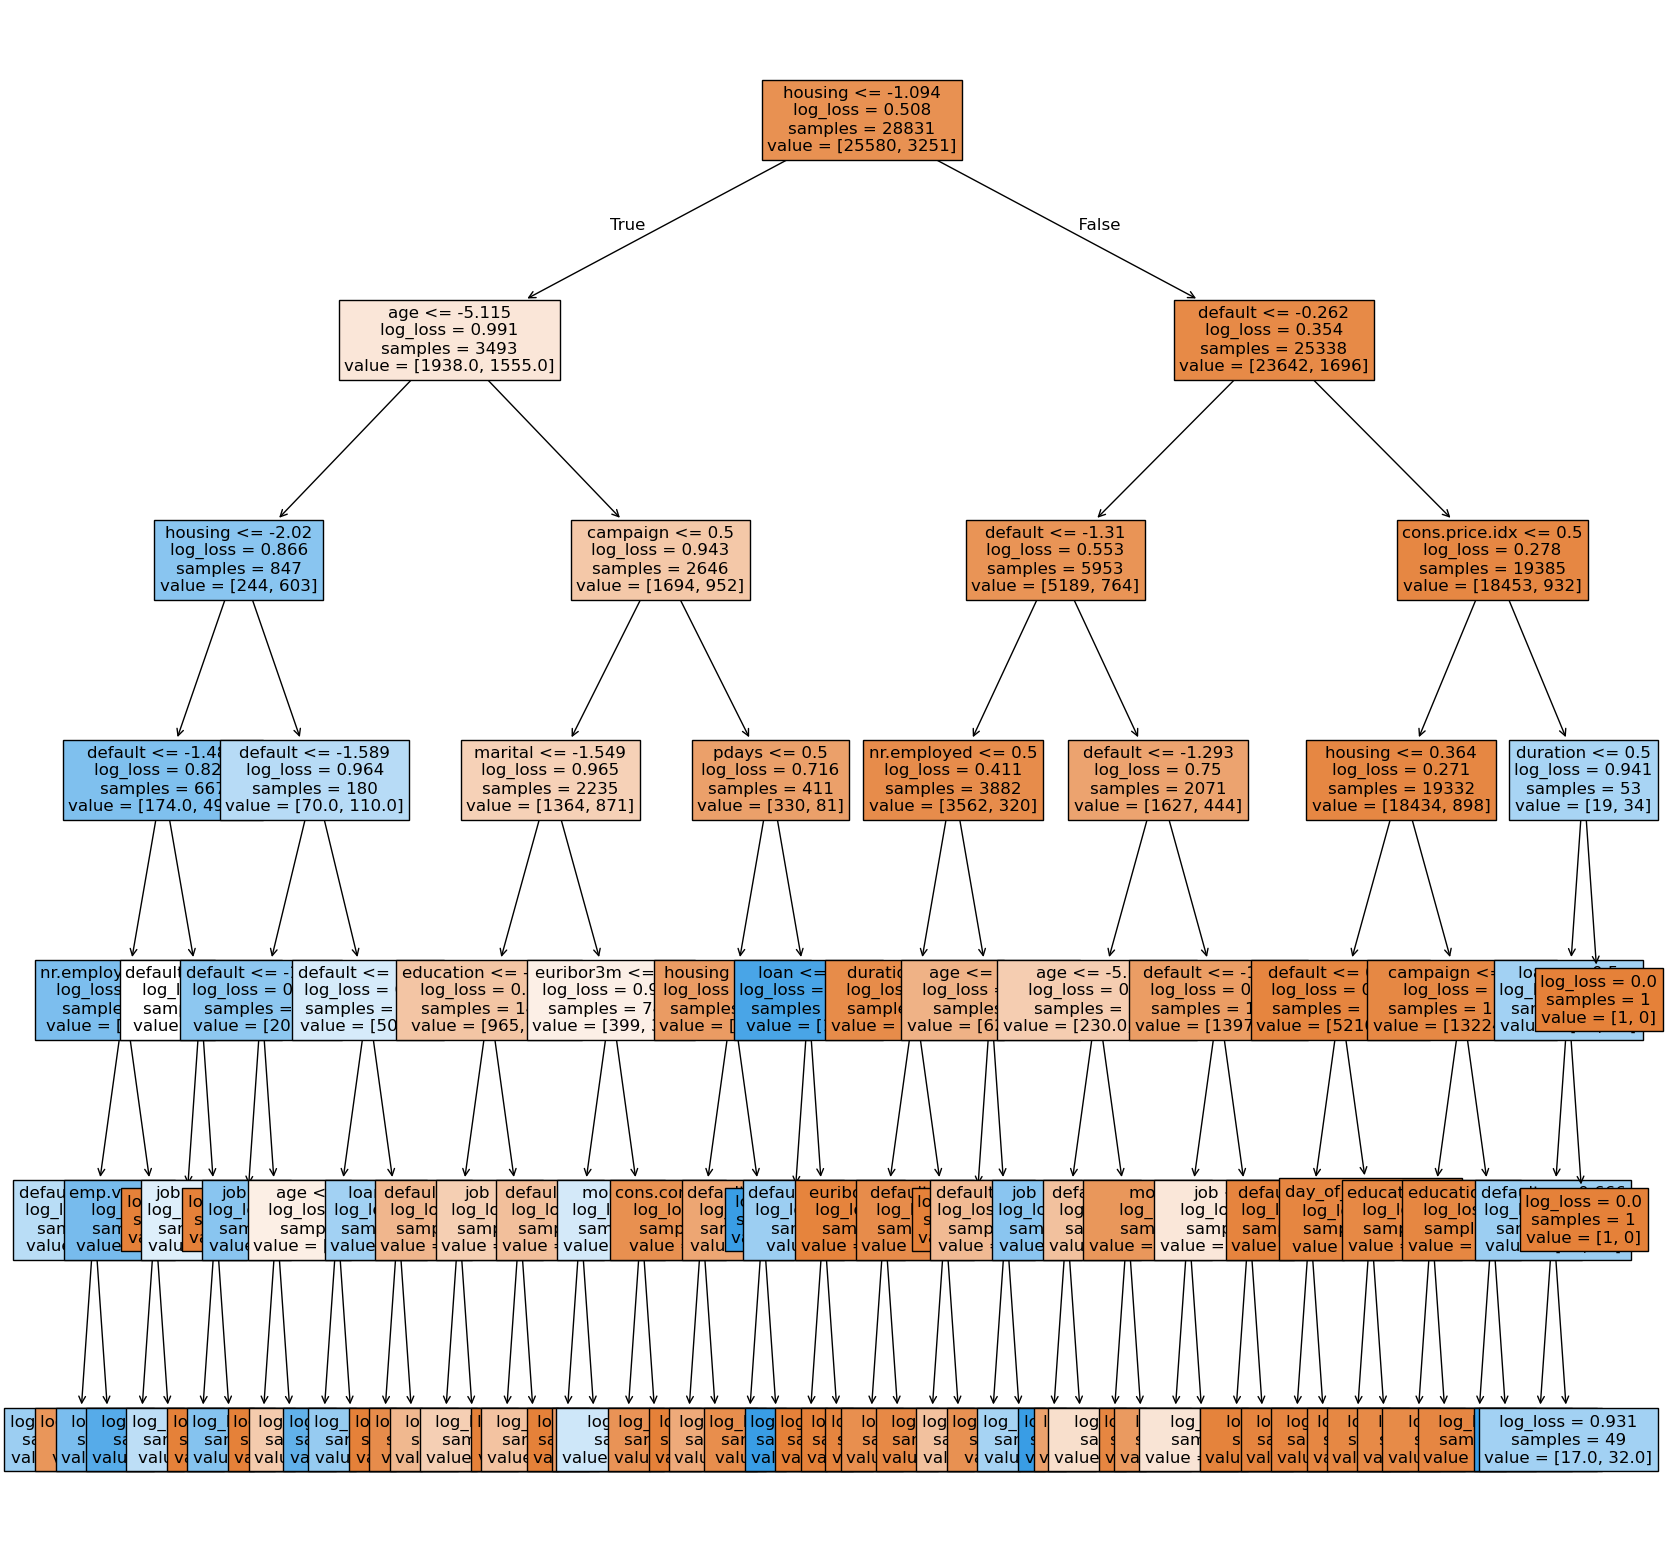

In [42]:
from matplotlib import pyplot as plt

features = df.columns

# Visualization of optimized Decision Tree
fig = plt.figure(figsize=(20,20))
_ = plot_tree(best_tree.named_steps['tree'], feature_names=features, filled=True, fontsize=12)
plt.show()

As we can see, the decision tree is still very complex, so we will prune it using cost_complexity_pruning path

Test score 0.9007849801731812
Test Confusion Matrix


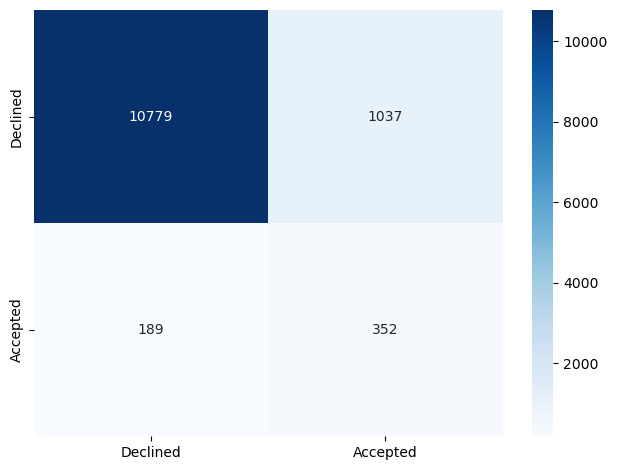

In [44]:
import seaborn as sns

train_pred = best_tree.predict(X_train)
test_pred = best_tree.predict(X_test)

classes = ['Declined', 'Accepted']

# Create function to plot confusion matrix
def plot_confusion_matrix(train_pred, y_train, val):
    print(f"{val} Confusion Matrix")
    cf = confusion_matrix(train_pred,y_train)
    sns.heatmap(cf, annot=True, yticklabels=classes, xticklabels=classes, cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

print(f'Test score {accuracy_score(test_pred,y_test)}')
plot_confusion_matrix(test_pred, y_test, val='Test')

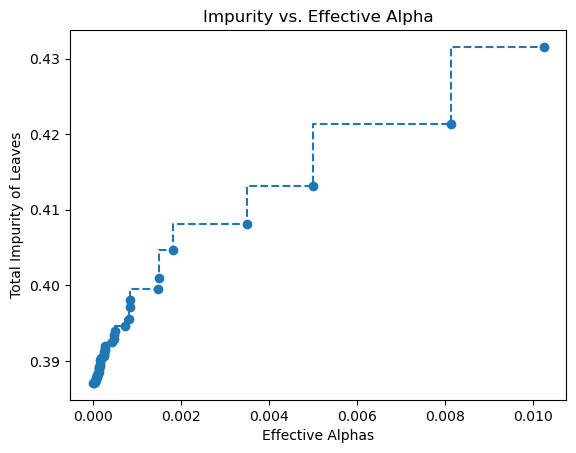

In [45]:
path = best_tree.named_steps['tree'].cost_complexity_pruning_path(best_tree[:-1].transform(X_train), y_train)

# Create list of ccp alpha values and impurities
ccp_alphas = path.ccp_alphas
impurities = path.impurities

# Visualize impurity vs. alpha
plt.step(ccp_alphas[:-1], impurities[:-1], '--o')
plt.title('Impurity vs. Effective Alpha')
plt.xlabel('Effective Alphas')
plt.ylabel('Total Impurity of Leaves');

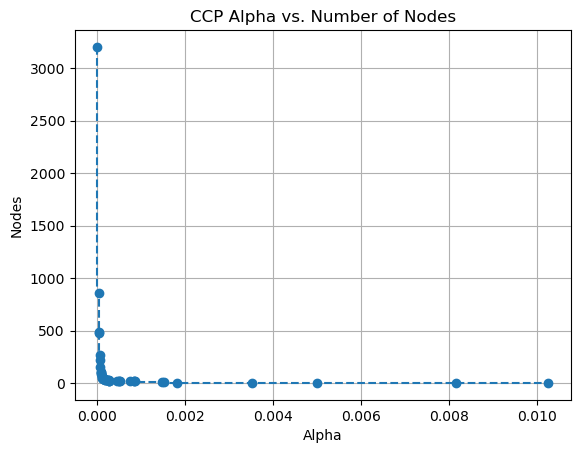

In [46]:
# Creating visualization of number of nodes vs alpha
nodes = []

for i in ccp_alphas[:-1]:
    dtree = DecisionTreeClassifier(ccp_alpha=i).fit(best_tree[:-1].transform(X_train), y_train)
    nodes.append(dtree.tree_.node_count)

plt.step(ccp_alphas[:-1], nodes, '--o')
plt.xlabel('Alpha')
plt.ylabel('Nodes')
plt.title('CCP Alpha vs. Number of Nodes')
plt.grid()

Optimal Alpha: 0.00013519334147954324
Optimal Accuracy: 0.9003803512179331


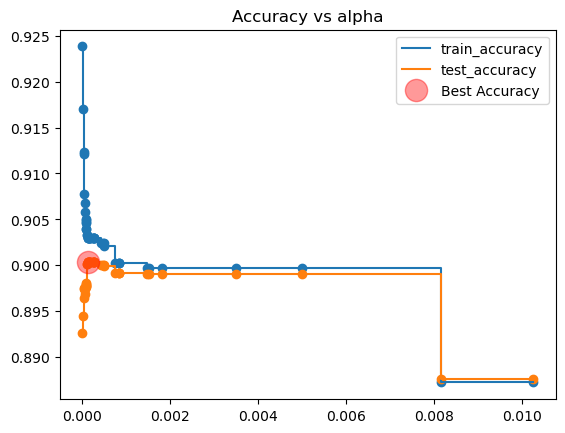

In [47]:
# Visualizing training and test accuracy vs alpha values to determine optimal alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)
    clf.fit(best_tree[:-1].transform(X_train), y_train)
    clfs.append(clf)

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

train_acc = []
test_acc = []
for c in clfs:
    train_pred = c.predict(best_tree[:-1].transform(X_train))
    test_pred = c.predict(best_tree[:-1].transform(X_test))
    train_acc.append(accuracy_score(train_pred,y_train))
    test_acc.append(accuracy_score(test_pred,y_test))

# Determining alpha with maximum accuracy
alpha_acc = pd.DataFrame({"Alpha": ccp_alphas, "Accuracy": test_acc})
max_row = alpha_acc.iloc[alpha_acc.max(axis=1).idxmax()]
alpha = max_row.iloc[0]
print(f"Optimal Alpha: {alpha}")
print(f"Optimal Accuracy: {max(test_acc)}")

# Plotting training and test accuracies
plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas[np.argmax(test_acc)], max(test_acc), 'ro', markersize=16, alpha=0.4, label='Best Accuracy')
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

##### Findings
* The highest test accuracy occurs at a ccp_alpha value of approximately 0.00013. We can use this hyperparameter in the Decision Tree Classifier to improve the accuracy, while also removing unnecessary branches from the tree

Test score 0.8875940762320952
Test Confusion Matrix


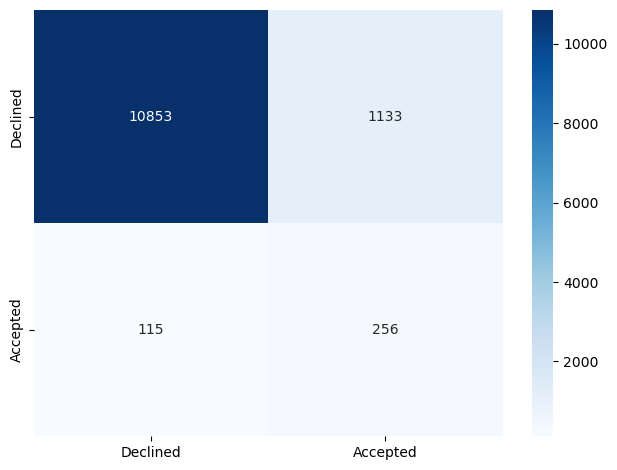

In [49]:
clf_ = DecisionTreeClassifier(ccp_alpha=0.004)
clf_.fit(best_tree[:-1].transform(X_train),y_train)
y_train_pred = clf_.predict(best_tree[:-1].transform(X_train))
y_test_pred = clf_.predict(best_tree[:-1].transform(X_test))

print(f'Test score {accuracy_score(test_pred,y_test)}')
plot_confusion_matrix(y_test_pred,y_test,val='Test')

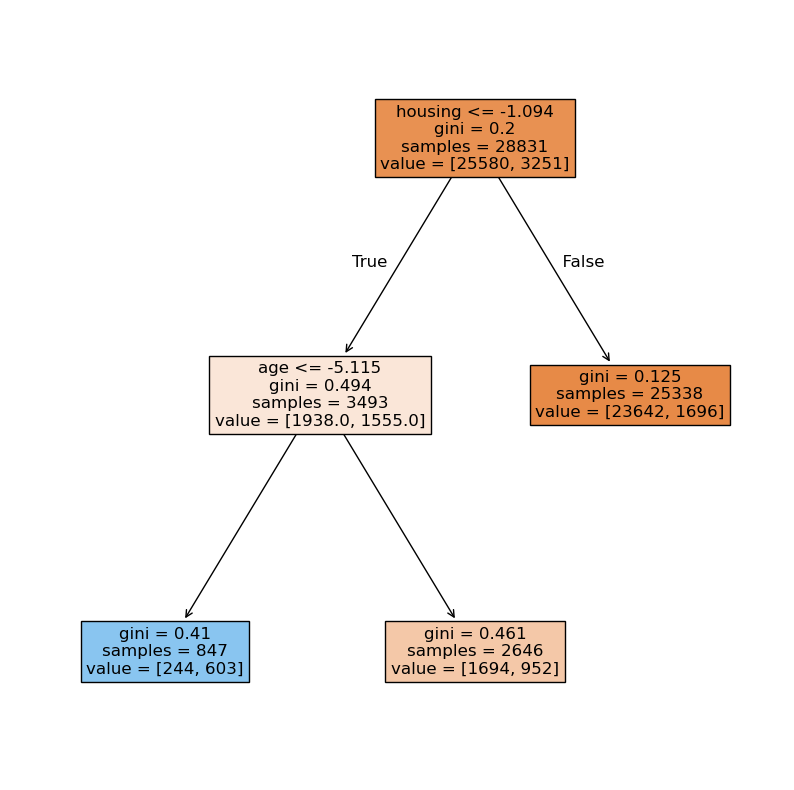

In [50]:
# tree_ = DecisionTreeClassifier(ccp_alpha=alpha)
tree_ = Pipeline([
    ('transform', preprocessor),
    ('selector', SelectKBest(k=20)),
    ('tree', DecisionTreeClassifier(ccp_alpha=alpha))
])

fig = plt.figure(figsize=(10,10))
features = df.columns
_ = plot_tree(clf_, feature_names=features, filled=True, fontsize=12)
plt.show()

In [51]:
model_dict = {decision_tree: "Default Decision Tree",
             best_tree: "Optimized Decision Tree",
             tree_: "Pruned Decision Tree"}

models = [decision_tree, best_tree, tree_]

model_checker(models)

,Model,Train Time,Train Accuracy,Test Accuracy
0,Default Decision Tree,0.222929,0.923832,0.892288
1,Optimized Decision Tree,0.195937,0.904270,0.900785
2,Pruned Decision Tree,0.210169,0.903021,0.900380


## Summary
Based on this exploration of the data, all classification algorithms outperformed a "no-skill" classifier that randomly makes predictions based on the overall distribution of the data. However, some algorithms had a higher accuracy than others, and some algorithms have severe limitations in terms of computation. After hyperparameter tuning, all algorithms had an accuracy score of 89-90%. This is in contrast to a 79% accuracy of a "no-skill" model. 

The two most accurate models after hyperparameter tuning were Decision Tree and Support Vector Machine (SVM). It is worth noting that prior to hyperparameter tuning, the Decision Tree algorithm had the worst accuracy out of all algorithms, which highlights the importance of hyperparameters. It is also worth noting that although Decision Tree and SVM algorithms resulted in similar accuracy scores, the difference in processing time is significant. Because the resulting accuracy is almost the same as Decision Trees, it is not worth it to pursue SVMs for this type of data set.

After optimizing the hyperparameters for Decision Trees further, it can also be "pruned" to remove branches that don't contribute very much accuracy. Initially, even after "optimization", the resulting decision tree contained over 100 nodes. By reducing the number of unnecessary branches, this can be reduced to only 5 nodes in total, which actually increases the accuracy even further.

Pruning the decision tree also gives insight into the most significant predictors for whether a client will accept the promotional material. The two largest factors to consider are the age of the client, and whether or not they have a housing loan. With only these two input features, our model can predict with 90.03% accuracy if a client will accept the promotional material.

We can also gain some insight into the effect of pruning by looking at the confusion matrices to get a sense of how many false positives and false negatives we can expect with either model. After pruning, the rate of false negatives decreases, while the rate of false positives increases. For this business case, this is an acceptable trade-off, as reducing the number of false negatives means more successful marketing campaigns. In contrast, an increase in false positives has less of an impact on the business, as declining the marketing campaign is already the majority class.